
File saved at: /content/simple_surface_with_cavity.obj


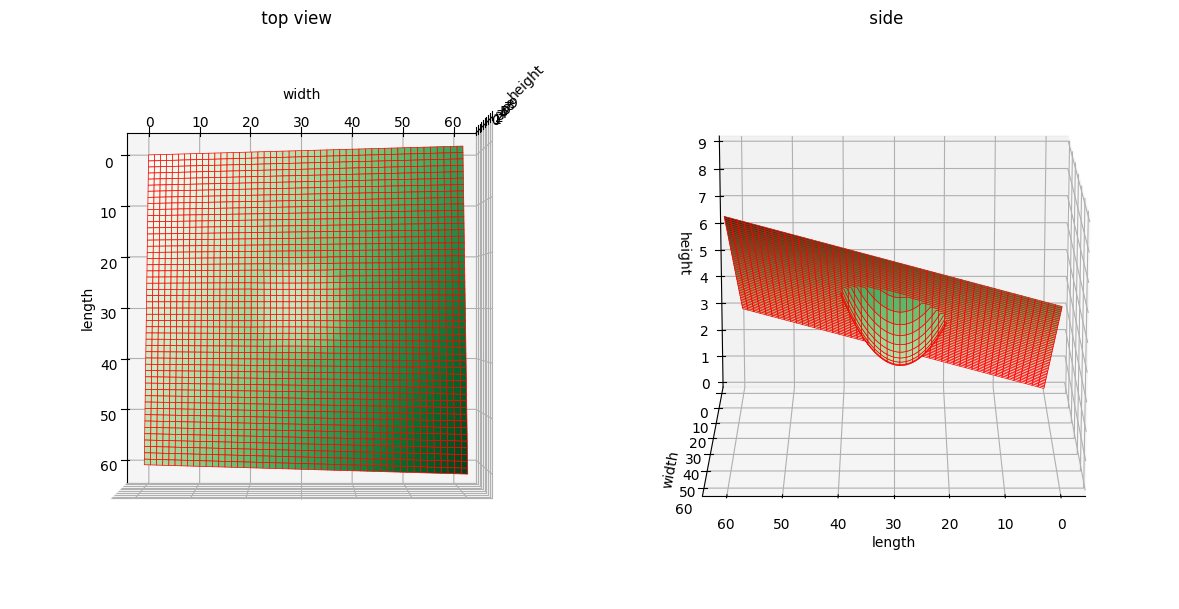

In [12]:
!pip install trimesh
# Configurable Simple Surface with a slope and a cavity in the middle
import numpy as np
import trimesh
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class SimpleSurfaceWithCavity:
    def __init__(self, params=None):
        # Default parameters
        self.default_params = {
            # Basic dimensions
            'length': 100,          # Length of the surface
            'width': 100,           # Width of the surface
            'resolution': 400,      # Grid resolution

            # Surface characteristics
            'base_height': 0,       # Base height of the surface
            'slope_x': 0.1,         # Slope in the X direction
            'slope_y': 0.05,        # Slope in the Y direction

            # Cavity parameters
            'cavity_radius': 10,     # Radius of the cavity
            'cavity_center': (50, 50), # Center of the cavity (x, y)
            'cavity_depth': 10.0,    # Maximum depth of the cavity from base height

            # Visualization
            'cmap': 'Greens',       # Color map for visualization
            'contour_color': 'red', # Color of contour lines
            'contour_width': 0.5,   # Width of contour lines
        }

        # Update with provided parameters
        self.params = self.default_params.copy()
        if params:
            self.params.update(params)

    def generate_surface(self):
        """Generate the simple terrain surface with a slope and a cavity."""
        # Create coordinate grid
        x = np.linspace(0, self.params['length'], self.params['resolution'])
        y = np.linspace(0, self.params['width'], self.params['resolution'])
        self.X, self.Y = np.meshgrid(x, y)
  ############## this part added ###############################################
        # linear slope
        self.Z = (self.params['base_height'] +
                  self.params['slope_x'] * self.X +
                  self.params['slope_y'] * self.Y)

        # cavity
        cavity_x, cavity_y = self.params['cavity_center']
        cavity_radius = self.params['cavity_radius']
        cavity_depth = self.params['cavity_depth']
        distance_from_center = np.sqrt((self.X - cavity_x)**2 + (self.Y - cavity_y)**2)


        self.Z -= np.where(
            distance_from_center <= cavity_radius,
            cavity_depth * (1 - (distance_from_center / cavity_radius)**2),
            0
        )
    #############################################################################
        # Create mesh
        vertices = np.column_stack((self.X.flatten(), self.Y.flatten(), self.Z.flatten()))

        # Create faces
        faces = []
        res = self.params['resolution']
        for i in range(res-1):
            for j in range(res-1):
                vertex = i * res + j
                faces.append([vertex, vertex+1, vertex+res])
                faces.append([vertex+1, vertex+res+1, vertex+res])

        self.mesh = trimesh.Trimesh(vertices=vertices, faces=faces)
        return self.mesh

    def save_and_show(self, filename="simple_surface_with_cavity.obj"):
        """Save the mesh and show visualization"""
        # Save mesh
        current_dir = os.getcwd()
        full_path = os.path.join(current_dir, filename)
        self.mesh.export(full_path)
        print(f"\nFile saved at: {full_path}")
   ############### this part changed ###################################
        #  graph
        fig = plt.figure(figsize=(12, 6))

        # from top view
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.plot_surface(self.X, self.Y, self.Z,
                         cmap=self.params['cmap'],
                         edgecolor=self.params['contour_color'],
                         linewidth=self.params['contour_width'])
        ax1.set_title(" top view")
        ax1.view_init(elev=90, azim=0)
        ax1.set_xlabel('length')
        ax1.set_ylabel('width')
        ax1.set_zlabel('height')

        # side view
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.plot_surface(self.X, self.Y, self.Z,
                         cmap=self.params['cmap'],
                         edgecolor=self.params['contour_color'],
                         linewidth=self.params['contour_width'])
        ax2.set_title(" side ")
        ax2.view_init(elev=15, azim=90)
        ax2.set_xlabel('length')
        ax2.set_ylabel('width')
        ax2.set_zlabel('height')

        plt.tight_layout()
        plt.show()
#############################################################################
# Example usage
if __name__ == "__main__":
    # Define custom parameters (optional)
    params = {
        'length': 60,
        'width': 60,
        'base_height': 0,
        'slope_x': 0.05,
        'slope_y': 0.1,
        'cavity_radius': 10,
        'cavity_center': (30, 30),
        'cavity_depth': 2
    }

    # Create and generate surface
    surface = SimpleSurfaceWithCavity(params)
    surface.generate_surface()
    surface.save_and_show()
